# Stations

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
stations = pd.read_json('202106.json', lines=True)
stations = stations['stations'][0]
stations = pd.DataFrame(stations)

In [ ]:
stations

In [ ]:
stations = stations[['id', 'address', 'name','total_bases', 'number', 'longitude', 'latitude']]

In [ ]:
stations

In [ ]:
stations['number'].unique()

Hay algunas estaciones que tienen dos numeros, estas deberíamos agruparlas

In [ ]:
import folium
stations['longitude'] = stations['longitude'].astype('float')
stations['latitude'] = stations['latitude'].astype('float')

In [ ]:
bike_stations = folium.Map(location=[stations.latitude.mean(), 
                           stations.longitude.mean()],
                 zoom_start=14, control_scale=True)

In [ ]:
for index, location_info in stations.iterrows():
    folium.Marker([location_info["latitude"], location_info["longitude"]], 
                  popup=location_info["name"]).add_to(bike_stations)

In [ ]:
bike_stations

In [ ]:
#! pip install geopy

In [ ]:
pip install geopy

In [ ]:
from geopy.geocoders import Nominatim

In [ ]:
geolocator = Nominatim(user_agent="geoapiExercises")


In [ ]:
place = "Puerta del Sol nº 1"
latitude = "40.4172137"
longitude = "-3.7018341"

In [ ]:
location = geolocator.geocode(latitude+","+longitude)

In [ ]:
latitude+","+longitude

In [ ]:
stations['location'] = stations['latitude'].map(str) + "," + stations['longitude'].map(str)

In [ ]:
stations

In [ ]:
stations['result'] = geolocator.geocode(stations['latitude'].map(str) + "," + stations['longitude'].map(str))

In [ ]:
stations

In [ ]:
stations['result'].unique()

In [ ]:
location = geolocator.geocode("40.44912,-3.72731")

In [ ]:
location

In [ ]:
stations['result'] = geolocator.geocode(stations["location"])

In [ ]:
stations_locations = stations['location']

In [ ]:
stations_locations

In [ ]:
#Define a function to obtain the location
#def get_postal_code(location):
    '''Obtains the location in coordinates (latitude, longitude) and return the postal code of the place'''
address=[]
postal_code=[]
for location in stations_locations:
    address += geolocator.geocode(location)



In [ ]:
def is_even(number):
    if number % 2 == 0:
        return False
    return True

In [ ]:
postal_code = []
df_address = pd.DataFrame(address, columns = ['address'] )
df_address['index'] = df_address.index
df_address['remove'] = df_address['index'].apply(is_even)
df_address = df_address[df_address['remove']==False]
df_address['list_addresses'] = df_address['address'].str.split(", ")
list_addresses = df_address['list_addresses'].to_list()
postal_code=[]
for i,lista in enumerate(list_addresses):
    postal_code.append(lista[-2])

In [ ]:
postal_codes = pd.DataFrame(postal_code, columns=['postal_code'])
postal_codes

In [ ]:
postal_codes

In [ ]:
stations['index'] = stations.index
stations

In [ ]:
postal_codes['index']=postal_codes.index

In [ ]:
postal_codes

In [ ]:
stations = stations.merge(postal_codes, on = 'index')

In [ ]:
stations

In [ ]:
stations['postal_code'].unique()

There are 29 postal codes, we are going to study the evolution of demand in each ares

In [ ]:
stations = stations[['id','address', 'name', 'total_bases', 'longitude', 'latitude', 'postal_code']]

In [ ]:
stations.to_csv("stations_final.csv")

#### How many stations per postal code?

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
stations_per_zone = stations.groupby('postal_code')['id'].count().reset_index()

In [ ]:
stations_per_zone=stations_per_zone.sort_values(by='id', ascending=False)

In [ ]:
plt.figure(figsize=(15,5))
plt.bar(stations_per_zone['postal_code'], height = stations_per_zone['id'])
plt.xticks(rotation=90);

In [ ]:
!pip install geopandas

## Visualization

In [ ]:
import pandas as pd
import geopandas as gpd

In [ ]:
stations = pd.read_csv("stations_final.csv")

In [ ]:
stations

In [ ]:
pip install geopandas

In [ ]:
import geopandas as gpd

In [ ]:
pip install fiona.whl

In [ ]:
! pip install GDAL-3.4.2-pp38-pypy38_pp73-win_amd64.whl

In [1]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [14]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point, Polygon, LineString, MultiPoint, mapping


In [18]:
shapefile = gpd.read_file('01.Centro/01_RTM_VERTICES_PT_16.shp')

In [19]:
shapefile

,OBJECTID,NIVEL,ID_CM,Vertice,geometry
0,334,01007005,151010.0,1068,POINT Z (439679.150 4475014.260 636.930)
1,342,01007005,15990.0,7775,POINT Z (439534.960 4474675.300 636.470)
2,343,01007005,151017.0,8147,POINT Z (439695.990 4474993.590 636.710)
3,507,01007005,15824.0,7764,POINT Z (438866.640 4474306.000 588.890)
4,758,01007005,151003.0,7777,POINT Z (439506.590 4475338.340 644.290)
...,...,...,...,...,...
107,2743,01007005,151849.0,3481,POINT Z (440229.330 4474256.010 646.850)
108,2744,01007005,151855.0,8195,POINT Z (440337.910 4474243.320 649.000)
109,2745,01007005,151857.0,N038,POINT Z (440312.770 4474242.400 648.800)
110,2746,01007005,151844.0,8087,POINT Z (440322.590 4474014.060 657.680)


<AxesSubplot:>

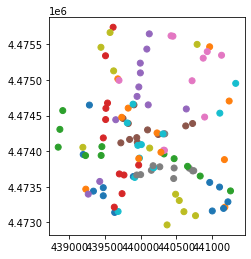

In [21]:
shapefile.plot(column = "Vertice")

In [22]:
shapefile = gpd.read_file('vertices/RTM.shp')

In [23]:
shapefile

,OBJECTID,VERTICE,TUNEL,VISIBLE_1,VISIBLE_2,VISIBLE_3,VISIBLE_4,VISIBLE_5,VISIBLE_6,VISIBLE_7,...,EMC_Y,EMC_Z,COTA,X_ETRS89,Y_ETRS89,Z_ORTOMET,Resena,SEÑAL,FECHA,geometry
0,1,101,None,3872,1479,7799,3845,None,None,None,...,0.004,0.004,Cabeza del clavo,443560.492,4473088.725,616.211987,https://geoportal.madrid.es/fsdescargas/IDEAM_...,Clavo Reglamentario.,2019-01-31,POINT (443560.492 4473088.725)
1,2,102,None,1463,6217,9940,None,None,None,None,...,0.002,0.002,Cabeza del clavo,444393.839,4472160.632,684.120989,https://geoportal.madrid.es/fsdescargas/IDEAM_...,Clavo Reglamentario Hormigonado.,2019-02-08,POINT (444393.839 4472160.632)
2,3,109,None,9061,9088,8717,None,None,None,None,...,0.003,0.003,Cabeza del clavo,446492.640,4467501.131,628.846979,https://geoportal.madrid.es/fsdescargas/IDEAM_...,Clavo Reglamentario.,2020-07-24,POINT (446492.640 4467501.131)
3,4,124,None,9874,6480,None,None,None,None,None,...,0.002,0.002,Cabeza del clavo,447604.747,4472651.249,695.514011,https://geoportal.madrid.es/fsdescargas/IDEAM_...,Clavo Reglamentario.,2019-02-08,POINT (447604.747 4472651.249)
4,5,126,None,2537,4199,1492,None,None,None,None,...,0.003,0.003,Cabeza del clavo,444838.649,4474119.770,666.227007,https://geoportal.madrid.es/fsdescargas/IDEAM_...,Clavo Reglamentario.,2019-03-06,POINT (444838.649 4474119.770)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5310,5311,N143,None,1199,None,None,None,None,None,None,...,0.003,0.003,Cabeza del clavo,438794.618,4469418.395,601.101017,https://geoportal.madrid.es/fsdescargas/IDEAM_...,Clavo Reglamentario.,2019-02-28,POINT (438794.618 4469418.395)
5311,5312,N144,None,1435,20311042,None,None,None,None,None,...,0.003,0.003,Cabeza del clavo,439602.581,4469459.797,590.838003,https://geoportal.madrid.es/fsdescargas/IDEAM_...,Clavo Reglamentario.,2019-02-28,POINT (439602.581 4469459.797)
5312,5313,N145,None,2825,None,None,None,None,None,None,...,0.004,0.004,Cabeza del clavo,440670.523,4470082.319,579.864979,https://geoportal.madrid.es/fsdescargas/IDEAM_...,Clavo Reglamentario.,2019-02-01,POINT (440670.523 4470082.319)
5313,5314,N147,None,None,None,None,None,None,None,None,...,0.004,0.004,Cabeza del clavo,446543.772,4471132.690,649.798012,https://geoportal.madrid.es/fsdescargas/IDEAM_...,Clavo Reglamentario.,2019-01-29,POINT (446543.772 4471132.690)


<AxesSubplot:>

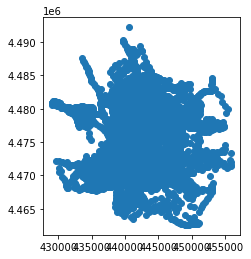

In [24]:
shapefile.plot()

In [25]:
shapefile = gpd.read_file('España/espania.shp')

In [26]:
shapefile

,SP_ID,ID_CP,COD_POSTAL,ALTA_DB,geometry
0,0,1.001000e+10,01193,2015-07-09,"POLYGON ((-2.53060 42.81828, -2.53061 42.81814..."
1,1,1.001000e+10,01240,2015-07-09,"POLYGON ((-2.49361 42.85699, -2.49361 42.85699..."
2,2,1.002000e+10,01468,2015-07-09,"POLYGON ((-2.97525 42.93816, -2.97526 42.93815..."
3,3,1.002000e+10,01470,2015-07-09,"POLYGON ((-2.91984 43.06241, -2.93543 43.06835..."
4,4,1.002000e+10,01468,2015-07-09,"POLYGON ((-3.01941 43.03516, -3.01761 43.03644..."
...,...,...,...,...,...
16278,48313,4.624400e+11,46900,2015-07-09,"POLYGON ((-0.55474 39.42881, -0.54843 39.42184..."
16279,48413,4.610900e+11,46370,2015-07-09,"POLYGON ((-0.59122 39.47843, -0.59123 39.47839..."
16280,48513,4.613600e+11,46370,2015-07-09,"POLYGON ((-0.61698 39.44276, -0.61697 39.44274..."
16281,48610,4.624200e+11,46143,2015-07-09,"POLYGON ((-1.26137 40.09470, -1.25979 40.09480..."


<AxesSubplot:>

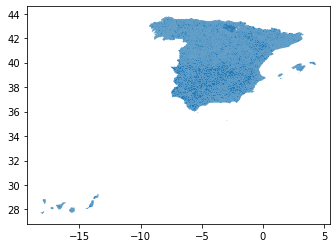

In [27]:
shapefile.plot()

In [30]:
codigos_madrid = pd.read_csv("codigos_madrid.csv", sep = ";")

In [31]:
codigos_madrid

,Provincia,codigo_postal
0,Madrid,28000
1,Madrid,28001
2,Madrid,28002
3,Madrid,28003
4,Madrid,28004
...,...,...
332,Parla,28982
333,Parla,28983
334,Parla,28984
335,Torrejón de Velasco,28990


In [32]:
shapefile

,SP_ID,ID_CP,COD_POSTAL,ALTA_DB,geometry
0,0,1.001000e+10,01193,2015-07-09,"POLYGON ((-2.53060 42.81828, -2.53061 42.81814..."
1,1,1.001000e+10,01240,2015-07-09,"POLYGON ((-2.49361 42.85699, -2.49361 42.85699..."
2,2,1.002000e+10,01468,2015-07-09,"POLYGON ((-2.97525 42.93816, -2.97526 42.93815..."
3,3,1.002000e+10,01470,2015-07-09,"POLYGON ((-2.91984 43.06241, -2.93543 43.06835..."
4,4,1.002000e+10,01468,2015-07-09,"POLYGON ((-3.01941 43.03516, -3.01761 43.03644..."
...,...,...,...,...,...
16278,48313,4.624400e+11,46900,2015-07-09,"POLYGON ((-0.55474 39.42881, -0.54843 39.42184..."
16279,48413,4.610900e+11,46370,2015-07-09,"POLYGON ((-0.59122 39.47843, -0.59123 39.47839..."
16280,48513,4.613600e+11,46370,2015-07-09,"POLYGON ((-0.61698 39.44276, -0.61697 39.44274..."
16281,48610,4.624200e+11,46143,2015-07-09,"POLYGON ((-1.26137 40.09470, -1.25979 40.09480..."


In [36]:
shapefile['codigo_postal'] = shapefile["COD_POSTAL"]

In [41]:
shapefile['codigo_postal'] = shapefile['codigo_postal'].astype('int64')

In [38]:
codigos_madrid['codigo_postal']

0      28000
1      28001
2      28002
3      28003
4      28004
       ...  
332    28982
333    28983
334    28984
335    28990
336    28991
Name: codigo_postal, Length: 337, dtype: int64

In [42]:
shapefile = shapefile.merge(codigos_madrid, how='inner',left_on = "codigo_postal", right_on="codigo_postal")

In [43]:
shapefile

,SP_ID,ID_CP,COD_POSTAL,ALTA_DB,geometry,codigo_postal,Provincia
0,1932,1.906700e+11,28190,2015-07-09,"POLYGON ((-3.40249 41.21362, -3.40140 41.21372...",28190,Montejo de la Sierra
1,1932,1.906700e+11,28190,2015-07-09,"POLYGON ((-3.40249 41.21362, -3.40140 41.21372...",28190,Puebla de la Sierra
2,21127,2.811800e+11,28190,2015-07-09,"POLYGON ((-3.49077 40.97509, -3.49077 40.97511...",28190,Montejo de la Sierra
3,21127,2.811800e+11,28190,2015-07-09,"POLYGON ((-3.49077 40.97509, -3.49077 40.97511...",28190,Puebla de la Sierra
4,14928,2.808800e+11,28190,2015-07-09,"POLYGON ((-3.50057 41.12202, -3.50056 41.12195...",28190,Montejo de la Sierra
...,...,...,...,...,...,...,...
458,35610,2.808900e+11,28950,2015-07-09,"POLYGON ((-3.84111 40.28575, -3.84111 40.28575...",28950,Moraleja de Enmedio
459,3588,2.813300e+11,28680,2015-07-09,"POLYGON ((-4.32120 40.41039, -4.32103 40.41014...",28680,San Martín de Valdeiglesias
460,3598,2.801900e+11,28390,2015-07-09,"POLYGON ((-3.34412 40.10576, -3.34378 40.11005...",28390,Belmonte de Tajo
461,36115,2.808000e+11,28220,2015-07-09,"POLYGON ((-3.89365 40.48858, -3.89250 40.48767...",28220,Majadahonda


In [46]:
import matplotlib.pyplot as plt

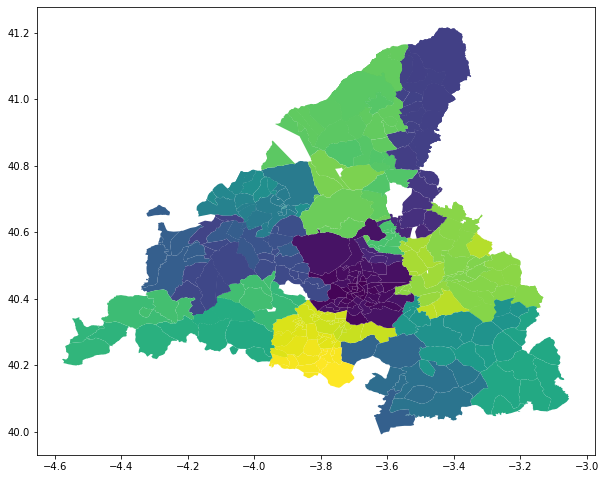

In [50]:

fig, ax = plt.subplots(figsize=(10,10))
shapefile.plot(ax=ax, column = "codigo_postal");

In [51]:
shapefile

,SP_ID,ID_CP,COD_POSTAL,ALTA_DB,geometry,codigo_postal,Provincia
0,1932,1.906700e+11,28190,2015-07-09,"POLYGON ((-3.40249 41.21362, -3.40140 41.21372...",28190,Montejo de la Sierra
1,1932,1.906700e+11,28190,2015-07-09,"POLYGON ((-3.40249 41.21362, -3.40140 41.21372...",28190,Puebla de la Sierra
2,21127,2.811800e+11,28190,2015-07-09,"POLYGON ((-3.49077 40.97509, -3.49077 40.97511...",28190,Montejo de la Sierra
3,21127,2.811800e+11,28190,2015-07-09,"POLYGON ((-3.49077 40.97509, -3.49077 40.97511...",28190,Puebla de la Sierra
4,14928,2.808800e+11,28190,2015-07-09,"POLYGON ((-3.50057 41.12202, -3.50056 41.12195...",28190,Montejo de la Sierra
...,...,...,...,...,...,...,...
458,35610,2.808900e+11,28950,2015-07-09,"POLYGON ((-3.84111 40.28575, -3.84111 40.28575...",28950,Moraleja de Enmedio
459,3588,2.813300e+11,28680,2015-07-09,"POLYGON ((-4.32120 40.41039, -4.32103 40.41014...",28680,San Martín de Valdeiglesias
460,3598,2.801900e+11,28390,2015-07-09,"POLYGON ((-3.34412 40.10576, -3.34378 40.11005...",28390,Belmonte de Tajo
461,36115,2.808000e+11,28220,2015-07-09,"POLYGON ((-3.89365 40.48858, -3.89250 40.48767...",28220,Majadahonda


In [52]:
stations = pd.read_csv("stations_final.csv")

In [53]:
stations

,Unnamed: 0,id,address,name,total_bases,longitude,latitude,postal_code
0,0,1,Puerta del Sol nº 1,Puerta del Sol A,30,-3.701834,40.417214,28014
1,1,2,Puerta del Sol nº 1,Puerta del Sol B,30,-3.701603,40.417313,28014
2,2,3,Calle Miguel Moya nº 1,Miguel Moya,24,-3.705842,40.420589,28004
3,3,4,Plaza del Conde del Valle de Súchil nº 3,Plaza Conde Suchil,18,-3.706917,40.430294,28001
4,4,5,Calle Manuela Malasaña nº 5,Malasaña,24,-3.702587,40.428552,28004
...,...,...,...,...,...,...,...,...
259,259,265,Avenida Juan de Herrera frente a la calle Paul...,INEF,24,-3.729970,40.438960,28001
260,260,266,Avenida de la Complutense (Metro Ciudad Univer...,Ciudad Universitaria 1,24,-3.726990,40.443750,28001
261,261,267,Avenida de la Complutense (Metro Ciudad Univer...,Ciudad Universitaria 2,24,-3.726930,40.443420,28001
262,262,268,Calle José Antonio Novais frente al nº 12,Facultad Biología,24,-3.727310,40.449120,28001


In [58]:
number_stations = stations.groupby('postal_code')['id'].count().reset_index()

In [60]:
number_stations['number_stations'] = number_stations ['id']
number_stations = number_stations[['postal_code', 'number_stations']]

In [61]:
number_stations

,postal_code,number_stations
0,28001,107
1,28002,1
2,28003,9
3,28004,16
4,28005,14
5,28006,6
6,28007,12
7,28008,1
8,28009,12
9,28010,2


In [63]:
shapefile = shapefile.merge(number_stations, how='left', left_on ="codigo_postal", right_on="postal_code")

In [64]:
shapefile

,SP_ID,ID_CP,COD_POSTAL,ALTA_DB,geometry,codigo_postal,Provincia,postal_code,number_stations
0,1932,1.906700e+11,28190,2015-07-09,"POLYGON ((-3.40249 41.21362, -3.40140 41.21372...",28190,Montejo de la Sierra,NaN,NaN
1,1932,1.906700e+11,28190,2015-07-09,"POLYGON ((-3.40249 41.21362, -3.40140 41.21372...",28190,Puebla de la Sierra,NaN,NaN
2,21127,2.811800e+11,28190,2015-07-09,"POLYGON ((-3.49077 40.97509, -3.49077 40.97511...",28190,Montejo de la Sierra,NaN,NaN
3,21127,2.811800e+11,28190,2015-07-09,"POLYGON ((-3.49077 40.97509, -3.49077 40.97511...",28190,Puebla de la Sierra,NaN,NaN
4,14928,2.808800e+11,28190,2015-07-09,"POLYGON ((-3.50057 41.12202, -3.50056 41.12195...",28190,Montejo de la Sierra,NaN,NaN
...,...,...,...,...,...,...,...,...,...
458,35610,2.808900e+11,28950,2015-07-09,"POLYGON ((-3.84111 40.28575, -3.84111 40.28575...",28950,Moraleja de Enmedio,NaN,NaN
459,3588,2.813300e+11,28680,2015-07-09,"POLYGON ((-4.32120 40.41039, -4.32103 40.41014...",28680,San Martín de Valdeiglesias,NaN,NaN
460,3598,2.801900e+11,28390,2015-07-09,"POLYGON ((-3.34412 40.10576, -3.34378 40.11005...",28390,Belmonte de Tajo,NaN,NaN
461,36115,2.808000e+11,28220,2015-07-09,"POLYGON ((-3.89365 40.48858, -3.89250 40.48767...",28220,Majadahonda,NaN,NaN


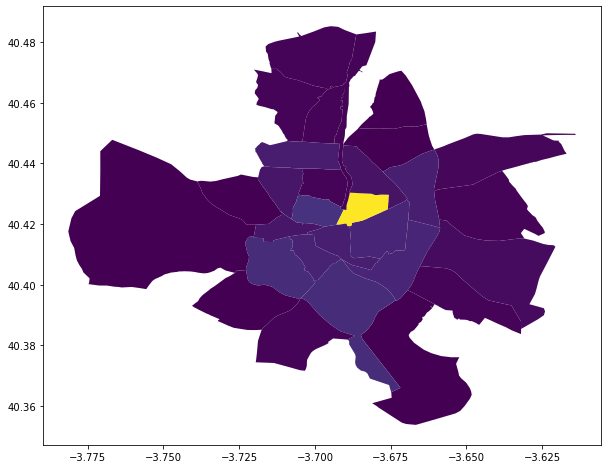

In [65]:
fig, ax = plt.subplots(figsize=(10,10))
shapefile.plot(ax=ax, column = "number_stations");

In [76]:
shapefile.fillna(0, inplace=True)

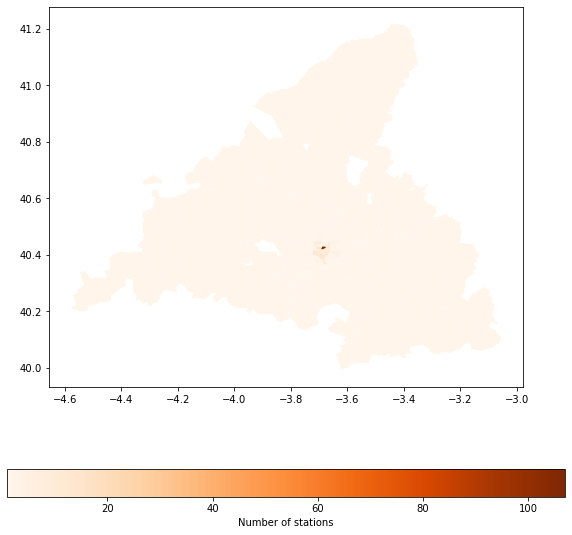

In [88]:
fig, ax = plt.subplots(figsize=(10,10))
shapefile.plot(ax=ax, column = "number_stations",cmap='Oranges', legend_kwds={'label': "Number of stations",
                                                                             'orientation': "horizontal"}, legend=True);

Now only with the postal codes in Madrid

In [84]:
shapefile_1 = shapefile[shapefile['Provincia']=="Madrid"]

In [92]:
import matplotlib.colors as mplc
import matplotlib.ticker as ticker


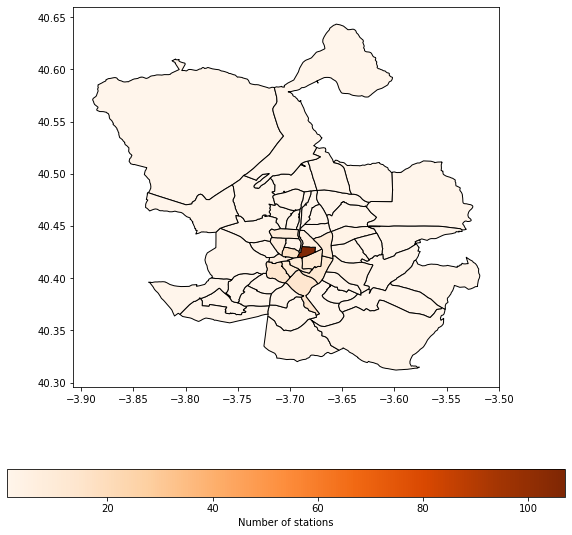

In [95]:
fig, ax = plt.subplots(figsize=(10,10))
shapefile_1.plot(ax=ax, column = "number_stations",cmap='Oranges', legend = True, legend_kwds={'label': "Number of stations",
                                                                             'orientation': "horizontal"},
                linewidth=1,
                edgecolor="black");